In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# generate the data
x = 10 * np.random.rand(100,1) - 2.8
y = 10 * np.random.rand(100,1) - 2.8

In [6]:
x.shape

(100, 1)

In [8]:
y.shape

(100, 1)

In [10]:
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
z.shape

(100, 1)

In [11]:
df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,5.050929,-0.150095,28.021614
1,1.182470,6.307912,46.362424
2,7.019994,2.222867,59.357307
3,-0.642845,0.484951,1.449936
4,5.881345,-1.080901,39.146211
...,...,...,...
95,-1.750406,0.751252,5.604312
96,5.678158,4.752103,62.714859
97,6.074988,0.169238,39.948747
98,7.177673,0.117134,55.990470


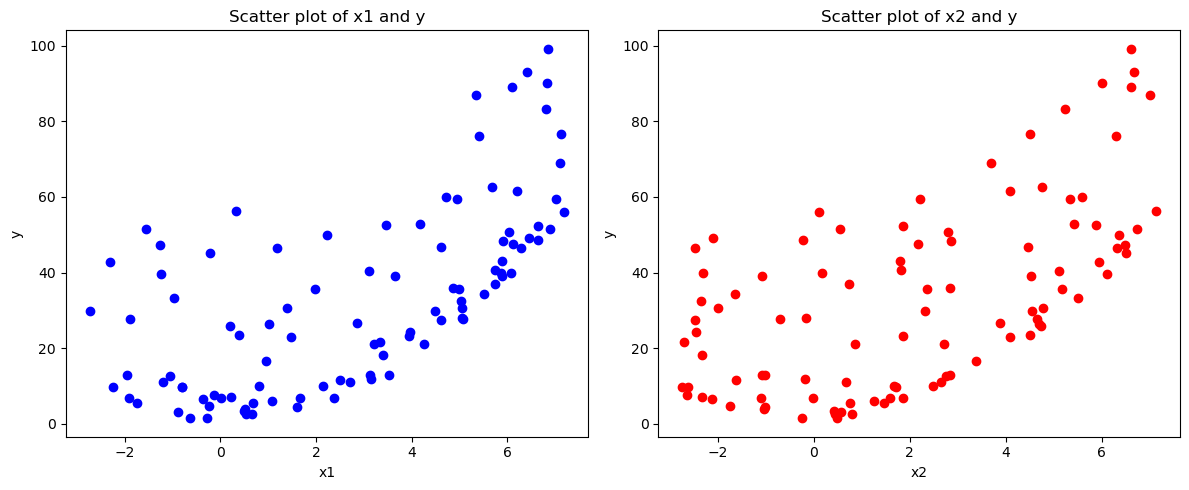

In [16]:
# Create a new figure and define subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot x1 and y
ax1.scatter(df['x1'], df['y'], color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

In [17]:
# Assumption 1- Residual plot

X = df[['x1','x2']]
y = df['y']

In [19]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [21]:
# Calculate predicted values and residuals
y_pred = model.predict(X)
residuals = y-y_pred
residuals

0    -6.393174
1     1.104717
2     2.366401
3    -4.895101
4     4.798073
        ...   
95    4.010764
96    0.527542
97   -1.666571
98    8.587189
99    3.854223
Name: y, Length: 100, dtype: float64

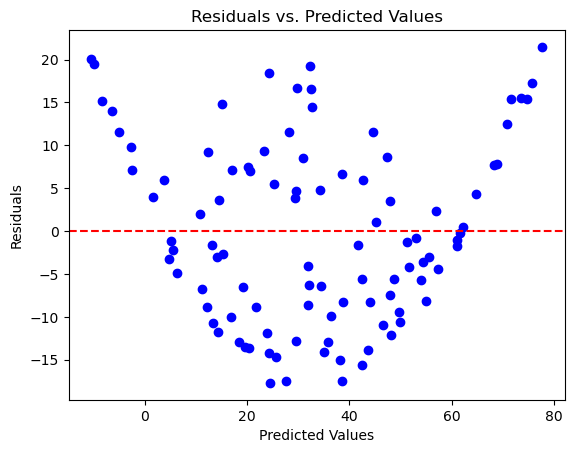

In [26]:
# Plot residuals against predicted values

plt.scatter(y_pred,residuals,color = 'blue')
plt.axhline(y = 0,color = 'red',linestyle = '--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [39]:
# Assumption 1----> Adding polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
# split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [41]:
# fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_y_pred = linear_model.predict(x_test)
linear_y_pred

array([15.9580476 , 13.94244749, 29.09071091, 74.85753932, -1.57449796,
       72.86941956, 57.50008334, 13.70358236, 48.2605863 , 52.1868733 ,
       28.27053772, 37.1588591 , 22.86047884, 50.10926487, 35.3872358 ,
       43.80223178,  6.57267239, -4.00895903, 33.00059016, 26.25431697])

In [42]:
# Calculate metrics for linear model
linear_r2 = r2_score(y_test,linear_y_pred)
linear_r2

0.8316553542754772

In [44]:
linear_mse = mean_squared_error(y_test,linear_y_pred)
linear_mse

108.95216564407338

In [53]:
# fit a polynomial model

poly_features = PolynomialFeatures(degree = 2)
x_train_poly = poly_features.fit_transform(x_train)
x_train_poly

array([[ 1.00000000e+00,  5.40791340e+00,  6.29610166e+00,
         2.92455273e+01,  3.40487725e+01,  3.96408962e+01],
       [ 1.00000000e+00,  6.83414592e+00,  6.01232109e+00,
         4.67055504e+01,  4.10890796e+01,  3.61480049e+01],
       [ 1.00000000e+00, -2.30593133e+00,  5.94476719e+00,
         5.31731928e+00, -1.37082249e+01,  3.53402569e+01],
       [ 1.00000000e+00,  2.14977706e+00,  1.66701261e+00,
         4.62154141e+00,  3.58370546e+00,  2.77893103e+00],
       [ 1.00000000e+00,  2.32677693e-01, -2.31458073e+00,
         5.41389086e-02, -5.38551303e-01,  5.35728394e+00],
       [ 1.00000000e+00, -7.94401803e-01, -2.73805897e+00,
         6.31074224e-01,  2.17511898e+00,  7.49696694e+00],
       [ 1.00000000e+00,  5.86572501e+00, -2.29945248e+00,
         3.44067299e+01, -1.34879559e+01,  5.28748171e+00],
       [ 1.00000000e+00,  4.95297672e+00,  5.34287277e+00,
         2.45319784e+01,  2.64631244e+01,  2.85462894e+01],
       [ 1.00000000e+00,  6.62927604e+00,  1.852

In [54]:
x_test_poly = poly_features.transform(x_test)
x_test_poly

array([[ 1.00000000e+00,  3.40015387e+00, -2.32958609e+00,
         1.15610463e+01, -7.92095115e+00,  5.42697135e+00],
       [ 1.00000000e+00, -2.73186809e+00,  4.54700831e+00,
         7.46310325e+00, -1.24218269e+01,  2.06752846e+01],
       [ 1.00000000e+00,  9.64614816e-01,  3.37526699e+00,
         9.30481744e-01,  3.25583254e+00,  1.13924272e+01],
       [ 1.00000000e+00,  6.40095528e+00,  6.66486720e+00,
         4.09722285e+01,  4.26615169e+01,  4.44204548e+01],
       [ 1.00000000e+00, -2.39945634e-01, -1.73387516e+00,
         5.75739072e-02,  4.16035775e-01,  3.00632308e+00],
       [ 1.00000000e+00,  6.09336744e+00,  6.60708306e+00,
         3.71291267e+01,  4.02593847e+01,  4.36535465e+01],
       [ 1.00000000e+00,  7.01999435e+00,  2.22286706e+00,
         4.92803206e+01,  1.56045142e+01,  4.94113798e+00],
       [ 1.00000000e+00,  6.63547285e-01,  4.50142396e-01,
         4.40294999e-01,  2.98690764e-01,  2.02628176e-01],
       [ 1.00000000e+00,  4.85528619e+00,  2.830

In [56]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
poly_y_pred = poly_model.predict(x_test_poly)
poly_y_pred

array([18.54318947, 30.09376587, 15.64239284, 94.19331548,  4.74900427,
       89.29152029, 59.4562634 ,  2.88040133, 36.32879696, 46.85667854,
       34.27975872, 46.21894329, 15.5612504 , 50.81413107, 28.39999693,
       29.73334849,  2.65055052,  6.24292262, 28.84603216, 10.61721859])

In [57]:
# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

In [58]:
# Compare model performance
print("Linear model")
print(f"R-squared: {linear_r2:.4f}")
print(f"Mean Squared Error: {linear_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")

Linear model
R-squared: 0.8317
Mean Squared Error: 108.9522

Polynomial model
R-squared: 0.9988
Mean Squared Error: 0.8021


In [ ]:
# Assumption 2 - Applying Transformation

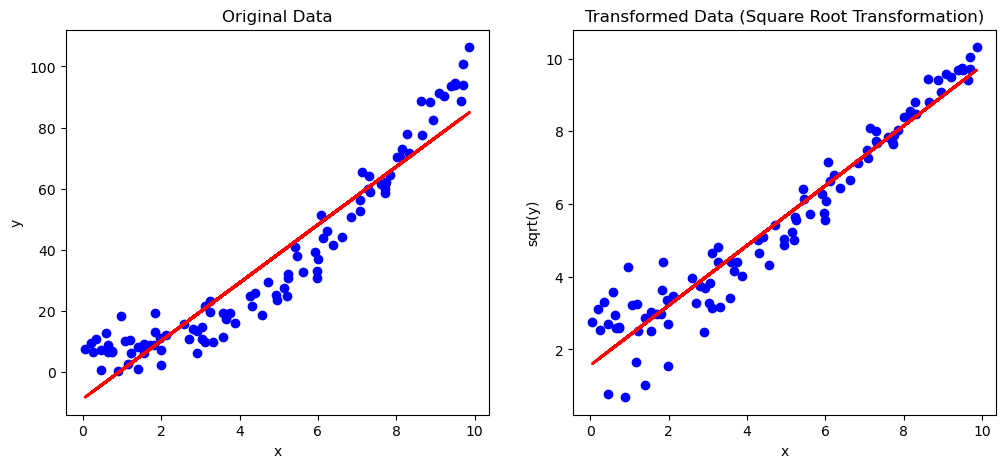

Original linear model
R-squared: 0.9008

Transformed linear model
R-squared: 0.9291


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative


# Apply square root transformation to y
y_sqrt = np.sqrt(y)

# Fit linear regression models for the original and transformed data
linear_model_original = LinearRegression()
linear_model_original.fit(x, y)
linear_model_transformed = LinearRegression()
linear_model_transformed.fit(x, y_sqrt)

# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")


In [ ]:
Assumption 1 - Applying Polynomial Regression

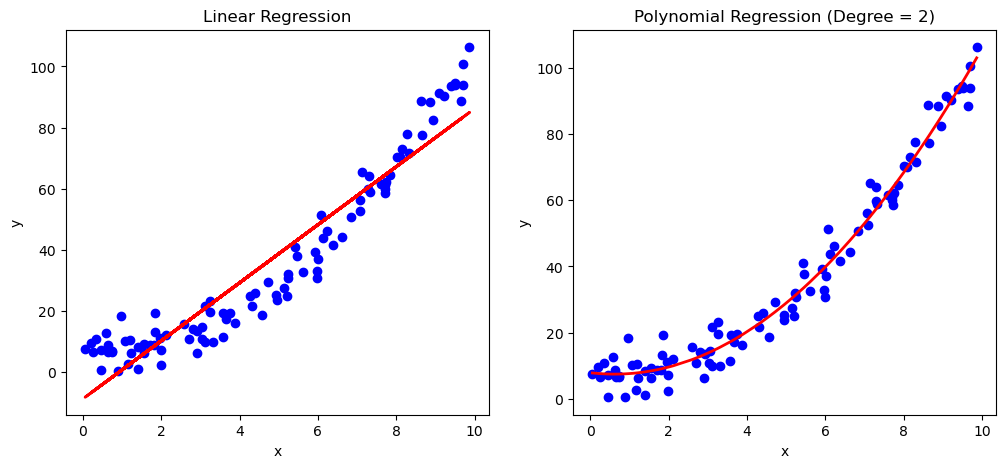

Linear regression
R-squared: 0.9008

Polynomial regression (degree = 2)
R-squared: 0.9782


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")